<a href="https://colab.research.google.com/github/saikiranpennam/Neural-Networks/blob/main/Assignment3_CS510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part1

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
# Hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

100%|██████████| 9912422/9912422 [00:00<00:00, 157185459.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 103623348.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 176425800.93it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21381064.84it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Step [100/600], Loss: 0.3379
Epoch [1/5], Step [200/600], Loss: 0.2505
Epoch [1/5], Step [300/600], Loss: 0.2354
Epoch [1/5], Step [400/600], Loss: 0.2294
Epoch [1/5], Step [500/600], Loss: 0.2541
Epoch [1/5], Step [600/600], Loss: 0.2091
Epoch [2/5], Step [100/600], Loss: 0.1404
Epoch [2/5], Step [200/600], Loss: 0.1980
Epoch [2/5], Step [300/600], Loss: 0.1215
Epoch [2/5], Step [400/600], Loss: 0.2495
Epoch [2/5], Step [500/600], Loss: 0.1824
Epoch [2/5], Step [600/600], Loss: 0.1299
Epoch [3/5], Step [100/600], Loss: 0.1124
Epoch [3/5], Step [200/600], Loss: 0.0928
Epoch [3/5], Step [300/600], Loss: 0.2222
Epoch [3/5], Step [400/600], Loss: 0.1496
Epoch [3/5], Step [500/600], Loss: 0.1889
Epoch [3/5], Step [600/600], Loss: 0.1643
Epoch [4/5], Step [100/600], Loss: 0.1176
Epoch [4/5], Step [200/600], Loss: 0.0883
Epoch [4/5], Step [300/600], Loss: 0.1457
Epoch [4/5], Step [400/600], Loss: 0.2748
E

#Part2

In [3]:
# Hyperparameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*64, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.2293
Epoch [1/5], Step [200/600], Loss: 0.0276
Epoch [1/5], Step [300/600], Loss: 0.1336
Epoch [1/5], Step [400/600], Loss: 0.0237
Epoch [1/5], Step [500/600], Loss: 0.0471
Epoch [1/5], Step [600/600], Loss: 0.0751
Epoch [2/5], Step [100/600], Loss: 0.0551
Epoch [2/5], Step [200/600], Loss: 0.0436
Epoch [2/5], Step [300/600], Loss: 0.0496
Epoch [2/5], Step [400/600], Loss: 0.0261
Epoch [2/5], Step [500/600], Loss: 0.0471
Epoch [2/5], Step [600/600], Loss: 0.0656
Epoch [3/5], Step [100/600], Loss: 0.0084
Epoch [3/5], Step [200/600], Loss: 0.0178
Epoch [3/5], Step [300/600], Loss: 0.0041
Epoch [3/5], Step [400/600], Loss: 0.0113
Epoch [3/5], Step [500/600], Loss: 0.0631
Epoch [3/5], Step [600/600], Loss: 0.0040
Epoch [4/5], Step [100/600], Loss: 0.0064
Epoch [4/5], Step [200/600], Loss: 0.1080
Epoch [4/5], Step [300/600], Loss: 0.0043
Epoch [4/5], Step [400/600], Loss: 0.0057
Epoch [4/5], Step [500/600], Loss: 0.0369
Epoch [4/5], Step [600/600], Loss:

#Part3

In [4]:
import numpy as np
from scipy.ndimage import gaussian_filter, zoom
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Resize images to 56x56
sigma = 1.5
zoom_factor = 2.0
train_images_56 = np.zeros((train_images.shape[0], 56, 56))
test_images_56 = np.zeros((test_images.shape[0], 56, 56))
for i in range(train_images.shape[0]):
    image = gaussian_filter(train_images[i], sigma=sigma)
    image_56 = zoom(image, zoom_factor)
    train_images_56[i] = image_56
for i in range(test_images.shape[0]):
    image = gaussian_filter(test_images[i], sigma=sigma)
    image_56 = zoom(image, zoom_factor)
    test_images_56[i] = image_56
train_images_56 = np.expand_dims(train_images_56, axis=-1)
test_images_56 = np.expand_dims(test_images_56, axis=-1)

# Normalize pixel values to [0, 1]
train_images_56 = train_images_56 / 255.0
test_images_56 = test_images_56 / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


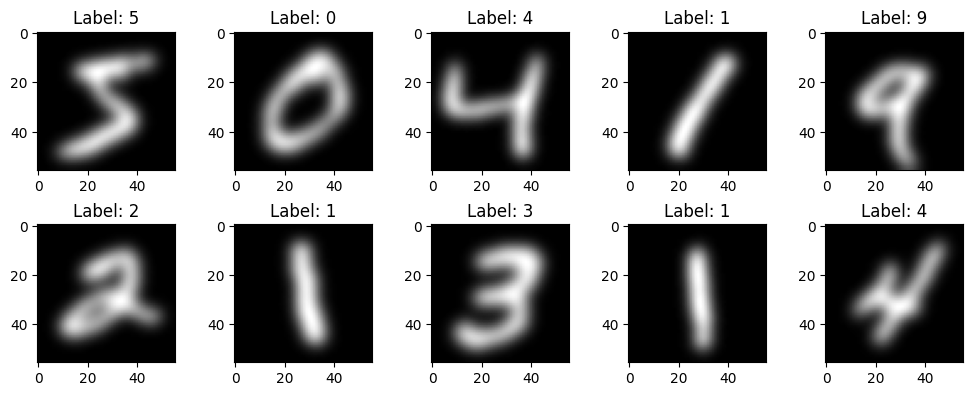

In [5]:
import matplotlib.pyplot as plt

# Display some examples of the resized images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images_56[i], cmap='gray')
    ax.set_title("Label: {}".format(train_labels[i].argmax()))
plt.tight_layout()
plt.show()

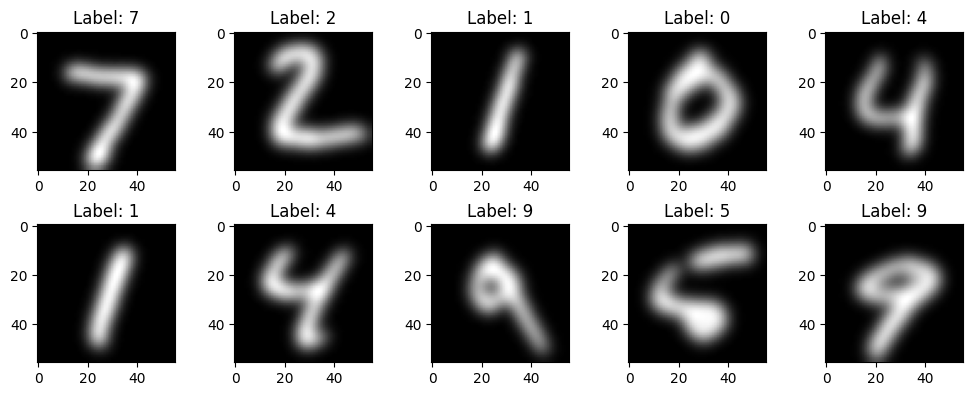

In [6]:
# Display some examples of the resized images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images_56[i], cmap='gray')
    ax.set_title("Label: {}".format(test_labels[i].argmax()))
plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# Define the Densely Connected Neural Network
dcnn = Sequential()
dcnn.add(Flatten(input_shape=(56, 56, 1)))
dcnn.add(Dense(128, activation='relu'))
dcnn.add(Dense(64, activation='relu'))
dcnn.add(Dense(10, activation='softmax'))
dcnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=[Accuracy()])

# Define the CNN Model
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=[Accuracy()])

# Train the models
dcnn.fit(train_images_56, train_labels, epochs=10, batch_size=32)
cnn.fit(train_images_56, train_labels, epochs=10, batch_size=32)

# Evaluate the models on the test dataset
_, dcnn_acc = dcnn.evaluate(test_images_56, test_labels)
_, cnn_acc = cnn.evaluate(test_images_56, test_labels)

# Print the accuracy of the models
print("Densely Connected Neural Network accuracy: {:.2f}%".format(dcnn_acc * 100) )
print("CNN Model accuracy: {:.2f}%".format(cnn_acc * 100) )

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2836 - accuracy: 1.6667e-05
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1627 - accuracy: 8.0000e-05
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1331 - accuracy: 2.7333e-04
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 9.8000e-04
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1012 - accuracy: 9.9333e-04
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0936 - accuracy: 0.0017
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0849 - accuracy: 0.0028
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0798 - accuracy: 0.0037
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0719 - accuracy: 0.0053
Epoch 10/10
1875/1875 [==============================] - 5s 3

#Part4

In [8]:
import numpy as np
from scipy.ndimage import gaussian_filter, zoom
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Resize images to 56x56
sigma = 1.5
zoom_factor = 2.0
train_images_56 = np.zeros((train_images.shape[0], 56, 56))
test_images_56 = np.zeros((test_images.shape[0], 56, 56))
for i in range(train_images.shape[0]):
    image = gaussian_filter(train_images[i], sigma=sigma)
    image_56 = zoom(image, zoom_factor)
    train_images_56[i] = image_56
for i in range(test_images.shape[0]):
    image = gaussian_filter(test_images[i], sigma=sigma)
    image_56 = zoom(image, zoom_factor)
    test_images_56[i] = image_56
train_images_56 = np.expand_dims(train_images_56, axis=-1)
test_images_56 = np.expand_dims(test_images_56, axis=-1)

# Normalize pixel values to [0, 1]
train_images_56 = train_images_56 / 255.0
test_images_56 = test_images_56 / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split images into top and bottom halves
train_top_half_56 = train_images_56[:, :28, :]
test_bottom_half_56 = test_images_56[:, 28:, :]

# Define and train densely connected neural network on top half of images
dense_model = Sequential([
    Flatten(input_shape=(28, 56)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dense_model.fit(train_top_half_56, train_labels, epochs=5, batch_size=32, validation_split=0.1)

# Define and train CNN model on top half of images
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 56, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_top_half_56, train_labels, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate accuracy on test images
dense_accuracy = dense_model.evaluate(test_bottom_half_56, test_labels)[1]
cnn_accuracy = cnn_model.evaluate(test_bottom_half_56, test_labels)[1]

print("Accuracy of Densely Connected Neural Network: {:.2f}%".format(dense_accuracy * 100))
print("Accuracy of CNN Model: {:.2f}%".format(cnn_accuracy * 100))

Epoch 1/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5293 - accuracy: 0.8389 - val_loss: 0.3096 - val_accuracy: 0.9080
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3330 - accuracy: 0.8956 - val_loss: 0.2677 - val_accuracy: 0.9182
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2886 - accuracy: 0.9083 - val_loss: 0.2574 - val_accuracy: 0.9203
Epoch 4/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2655 - accuracy: 0.9150 - val_loss: 0.2296 - val_accuracy: 0.9328
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2477 - accuracy: 0.9204 - val_loss: 0.2184 - val_accuracy: 0.9322
Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5002 - accuracy: 0.8443 - val_loss: 0.2864 - val_accuracy: 0.9153
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.9114 - val_loss: 0.2217 - val_accuracy: 0.9327